### Objective
### This file applies provides the  performance evaluation of each model.
### It employes the datframe  with type 1 vectorization (all features vectorized).

In [1]:
#pip install import-ipynb

In [2]:
import pandas as pd
import numpy as np

import import_ipynb

from cc_fi_variable_initializations import *
import cc_fi_fcts

import pickle

import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time

from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectFromModel

importing Jupyter notebook from cc_fi_variable_initializations.ipynb
importing Jupyter notebook from cc_fi_fcts.ipynb


 ### Problem   

### Data  related with bank marketing, based on phone calls, aiming at client subscription to bank products  (the so called term deposits) is provided. The purpose of this work is to predict whether a client will  accept/reject the subscription using  models employing the following supervised ML classifiers: KNN, Logisitic Regression, Decision Tree, Support Vector Machine.

### Read the treated data from memory and store it in a dataframe and recall information

In [3]:
val_name_numeric_dataframe_for_pickle

'df_num.pkl'

In [4]:
df_num=pd.read_pickle(val_name_numeric_dataframe_for_pickle)
df_num.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y1
0,56,0.100094,0.101577,0.102515,0.128794,0.108802,0.113405,0.052317,0.064352,0.099495,...,1,999,0,0.088325,1.1,93.994,-36.4,4.857,5191.0,0
1,57,0.081401,0.101577,0.108367,0.051536,0.108802,0.113405,0.052317,0.064352,0.099495,...,1,999,0,0.088325,1.1,93.994,-36.4,4.857,5191.0,0
2,37,0.081401,0.101577,0.108367,0.128794,0.116199,0.113405,0.052317,0.064352,0.099495,...,1,999,0,0.088325,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0.129738,0.101577,0.082060,0.128794,0.108802,0.113405,0.052317,0.064352,0.099495,...,1,999,0,0.088325,1.1,93.994,-36.4,4.857,5191.0,0
4,56,0.081401,0.101577,0.108367,0.128794,0.108802,0.109332,0.052317,0.064352,0.099495,...,1,999,0,0.088325,1.1,93.994,-36.4,4.857,5191.0,0


In [5]:
#the number of contacts performed during this campaign 
#we see there are clients with one phone call others with 43
#the number of calls to clients varies between 1 and 43
df_num["campaign"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43])

In [6]:
#the number of occurencies per number of phonecalls
df_num["campaign"].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64

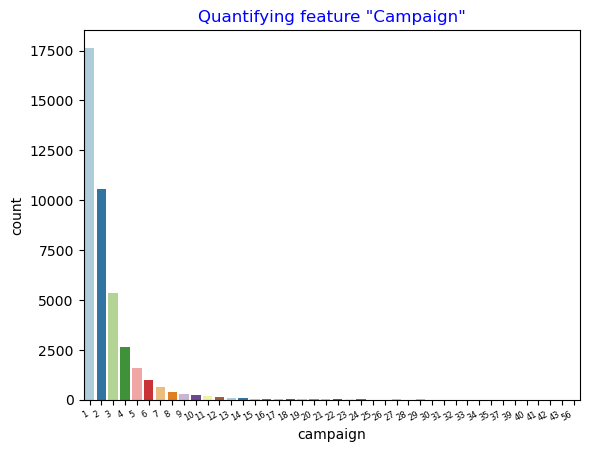

In [7]:
#feature "campaign" represents the number of contacts performed during this "campaign"
#to a client
#hereafter we show how many clients correspond to each possible value of
#feature "campaign"
plt.figure()
ax=sns.countplot(data=df_num[["campaign"]],x="campaign",palette="Paired")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=6,rotation=750, ha="right")
plt.title('Quantifying feature "Campaign"',c="blue");
#plt.tight_layout();

In [8]:
#recall of the dataframe information
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  float64
 2   marital         41188 non-null  float64
 3   education       41188 non-null  float64
 4   default         41188 non-null  float64
 5   housing         41188 non-null  float64
 6   loan            41188 non-null  float64
 7   contact         41188 non-null  float64
 8   month           41188 non-null  float64
 9   day_of_week     41188 non-null  float64
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  float64
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
#the dimension of the dataframe, number of rows, columns
df_num.shape

(41188, 21)

### Examining the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (previously categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (previously categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (previously categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (previously categorical: 'no','yes','unknown')
6 - housing: has housing loan? (previously categorical: 'no','yes','unknown')
7 - loan: has personal loan? (previously categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (previously categorical: 'cellular','telephone')
9 - month: last contact month of year (previously categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (previously categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (previously categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y1 - has the client subscribed a term deposit? (binary: 1 ('yes'),'0'('no'))
```



In [10]:
#from df.info() we saw that there are numer and object type features.
#from df.info  and/or percent_missing = df.isnull().sum() * 100 / len(df)
#we saw that there are no missing values 

### Split Data into Train Test Split

Since gridsearch with  k-fold cross validation will be employed
no validation (developement) set wil be considered. 
Data will be split into 2 subsets only (not three).

Data split employes the `stratify` so that both the train and test set would have a similar proportion of classes. 

In [11]:
v_df=df_num
v_target="y1"

X_train, X_test, y_train, y_test=\
train_test_split(\
v_df.drop(v_target, axis = 1),\
v_df[v_target],\
random_state = 42,\
stratify = v_df[v_target])

X_train.shape, X_test.shape

((30891, 20), (10297, 20))

### A Baseline Model

The  ML classifier should beat the score of the baseline model.

### Two ways of creating baseline model:
Either with the majority class for all datapoints or with DummyClassifier


### First baseline mode based on majority class

In [12]:
df_target=pd.DataFrame(y_train, columns=['y1'])
df_target

,y1
34300,0
25076,0
17533,0
35820,0
1080,0
...,...
14392,0
7494,0
10747,0
34138,0


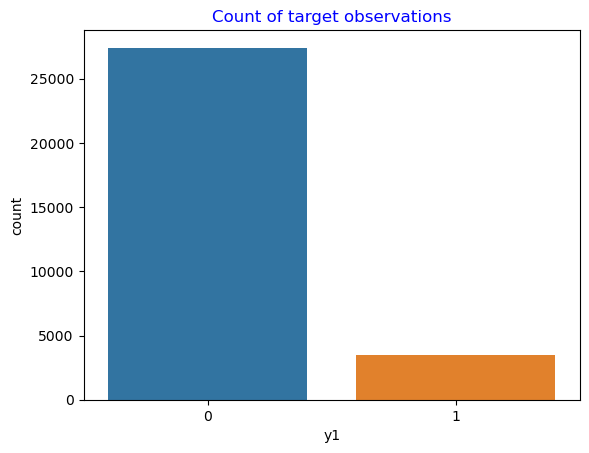

In [13]:
#we measure how many observatiosn are associates with
#the possible values of the target variable
sns.countplot(data=df_target,x="y1")
plt.title('Count of target observations',c="blue");

In [14]:
#distribution of the target values for the train set
y_train.value_counts(normalize=True)

0    0.887346
1    0.112654
Name: y1, dtype: float64

In [15]:
#distribution of the target values for the testn set
df_target_test=pd.DataFrame(y_test, columns=['y1'])
df_target_test.value_counts(normalize=True)

y1
0     0.887346
1     0.112654
dtype: float64

In [16]:
df_target_test

,y1
31165,1
26855,0
38292,0
8532,0
25472,0
...,...
2225,0
23672,0
12770,0
4177,0


### Second baseline mode using  DummyClassifier

In [17]:

dummy_clf = DummyClassifier().fit(X_train, y_train)
baseline_score = dummy_clf.score(X_test, y_test)

baseline_score

0.8873458288821987

### Simple Model Comparison
Comparison of classifiers created according to KNN, Logistsic Tegression, Decision tree and Support Vector Machine algorithms and using the default values


In [18]:
#pipeline for KNN
pipe_knn=Pipeline([
    ("scale",StandardScaler()),
    ("knn_clas", KNeighborsClassifier())
])

#The starting time for the pipe execution
start_t = time.time()
pipe_knn.fit(X_train, y_train)
#The ending time for the pipe execution
end_t = time.time()

#the train duration ofr the knn classifier
duration_knn_train=end_t - start_t

#the accuracy of the train set for the KNN
accuracy_knn_train=pipe_knn.score(X_train, y_train)

#the acuracy of the test set for the KNN
accuracy_knn_test=pipe_knn.score(X_test, y_test)

#training duration, accuracy for the training set, accuracy for the testing set
duration_knn_train,accuracy_knn_train,accuracy_knn_test

(0.01298379898071289, 0.9263863261144023, 0.9041468388851122)

In [19]:

#foc computing the fit time of classifiers

#start_t = time.time()
#logistic_reg=LogisticRegression().fit(X_train, y_train)
#end_t = time.time()

#or

#logistic regression classifier
pipe_log_reg=Pipeline([
("scaler",StandardScaler()),
("logistic_reg_clas",LogisticRegression())
])

start_t = time.time()
pipe_log_reg.fit(X_train, y_train)
end_t = time.time()

#the training duration for the logistic regression model
duration_log_reg_train=end_t - start_t


#for pipeline score is the accuracy for classificiation
#if we want another score
#from sklearn.metrics import balanced_accuracy
#y_pred = pipeline.predict(self.X[test])
#balanced_accuracy(self.y_test, y_pred)

#the accuracy for the train set for the  logistic regression model
accuracy_log_reg_train=pipe_log_reg.score(X_train, y_train)

#the accuracy for the test set for the  logistic regression model
accuracy_log_reg_test=pipe_log_reg.score(X_test, y_test)

duration_log_reg_train, accuracy_log_reg_train,accuracy_log_reg_test

(0.06582975387573242, 0.9091968534524619, 0.9119160920656502)

In [20]:
#decision tree

#decision trees are not sensitive to feature scaling 
#their splits don’t change with any monotonic transformation

#Normalization is not necessary either, but it can change  results

#for model homogeneity a pipeline for decision tree is created although
# a single model instatiation would suffice as the pipeline
#now is comprised only of oen step

#however we make the choice to create it as  further  we will employ it
#for gridserch
pipe_dtree=Pipeline([
("dt_clas",DecisionTreeClassifier(random_state=42))
])

start_t = time.time()
pipe_dtree.fit(X_train, y_train)
end_t = time.time()

#the training duration  for the decison tree classifier 
duration_dt_train=end_t - start_t

#y_pred_dt = dtree_clas.predict(X_test)
#accuracy_dt=accuracy_score(y_test, y_pred_dt)

#The accuracy for the train set for the decison tree classifier
accuracy_dt_train=pipe_dtree.score(X_train, y_train)

#The accuracy for the test set for the decison tree classifier
accuracy_dt_test=pipe_dtree.score(X_test, y_test)

duration_dt_train,accuracy_dt_train,accuracy_dt_test

(0.08850598335266113, 1.0, 1.0)

In [21]:
#pipeline for SVM support vector machine

#we scale data before as it may increase significantly the model performance

#pipeline for the support vector machine model
pipe_svm = Pipeline([
("scale",StandardScaler()),
("svm_clas", SVC())
])

#the time here will contain the standardization +pipeline delays
start_t = time.time()
pipe_svm.fit(X_train, y_train)
end_t = time.time()

#the train duration for the svm model 
duration_svm_train=end_t - start_t

#the accuracy for the train set for the svm model 
accuracy_svm_train=pipe_svm.score(X_train, y_train)

#the accuracy for the test set for the svm model 
accuracy_svm_test=pipe_svm.score(X_test, y_test)

accuracy_svm_train,accuracy_svm_test,duration_svm_train

(0.9217247742060795, 0.9145382150140817, 8.005692958831787)

In [22]:
#the dataframe witht he resutls for each classifier using accuracy for scoring
#and all the default values
dict_results=\
    {
        'Model': ['KNN', 'Logistic Regression', 'Decision Tree',"SVM"], 
        'Train Time': [round(duration_knn_train,3),\
                       round(duration_log_reg_train,3),\
                       round(duration_dt_train,3),\
                       round(duration_svm_train,3)],
        "Train Accuracy":[accuracy_knn_train,accuracy_log_reg_train,\
                         accuracy_dt_train,\
                         accuracy_svm_train],
        "Test Accuracy":[accuracy_knn_test,accuracy_log_reg_test,\
                         accuracy_dt_test,\
                         accuracy_svm_test]
    }

df_compare_clas = pd.DataFrame(dict_results).set_index("Model")
df_compare_clas

,Train Time,Train Accuracy,Test Accuracy
Model,,,
KNN,0.013,0.926386,0.904147
Logistic Regression,0.066,0.909197,0.911916
Decision Tree,0.089,1.000000,1.000000
SVM,8.006,0.921725,0.914538


In [23]:
#the classifier with the min test accuracy
clas_with_min_test_ac=df_compare_clas[['Test Accuracy']].idxmin()[0]
min_ac=df_compare_clas.loc[clas_with_min_test_ac]["Test Accuracy"]


#the classifier with the max test_accuracy
clas_with_max_test_ac=df_compare_clas[['Test Accuracy']].idxmax()[0]
max_ac=df_compare_clas.loc[clas_with_max_test_ac]["Test Accuracy"]

print("Clasifier with min Test Accuracy:", clas_with_min_test_ac, ", Accuracy : ",min_ac)
print()
print("clasifier with max Test Accuracy:", clas_with_max_test_ac, ", Accuracy : ",max_ac)
      

Clasifier with min Test Accuracy: KNN , Accuracy :  0.9041468388851122

clasifier with max Test Accuracy: Decision Tree , Accuracy :  1.0


In [24]:
#We observe that the worse classifier amongst the experimented ones does better than
#the base line model having precision ~88,7%

### Model Improvement

### Feature Selection

In [25]:

#many approaches for feature selction
#here we wille examine only the following two ones

### RandomForest Technique for Feature Selection

In [26]:
#we don't use this exaclty see below

#random forest
#from sklearn.ensemble import RandomForestClassfier
#from sklearn.feature_selection import SelectFromModel

#A random forest classifier 
#is a meta estimator that fits a number of decision tree classifiers 
#on various sub-samples of the dataset and 
#uses averaging to improve the predictive accuracy and control over-fitting
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#SelectFromModel
#Meta-transformer for selecting features based on importance weights.

#we specify the random forest instance, indicating the number of trees
# then
#use selectFromModel object from sklearn to automatically select the features.
#n_estimators = 100 default value we precise it to remember it
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)
sel.get_support()

#the name of selected features
selected_feat= X_train.columns[(sel.get_support())]
#the number of selected features
len(selected_feat)
#the name of selected features
print(selected_feat)

Index(['marital', 'default', 'housing', 'loan', 'contact', 'poutcome'], dtype='object')


In [27]:
#alternatively

Index(['marital', 'default', 'housing', 'loan', 'contact', 'poutcome'], dtype='object')

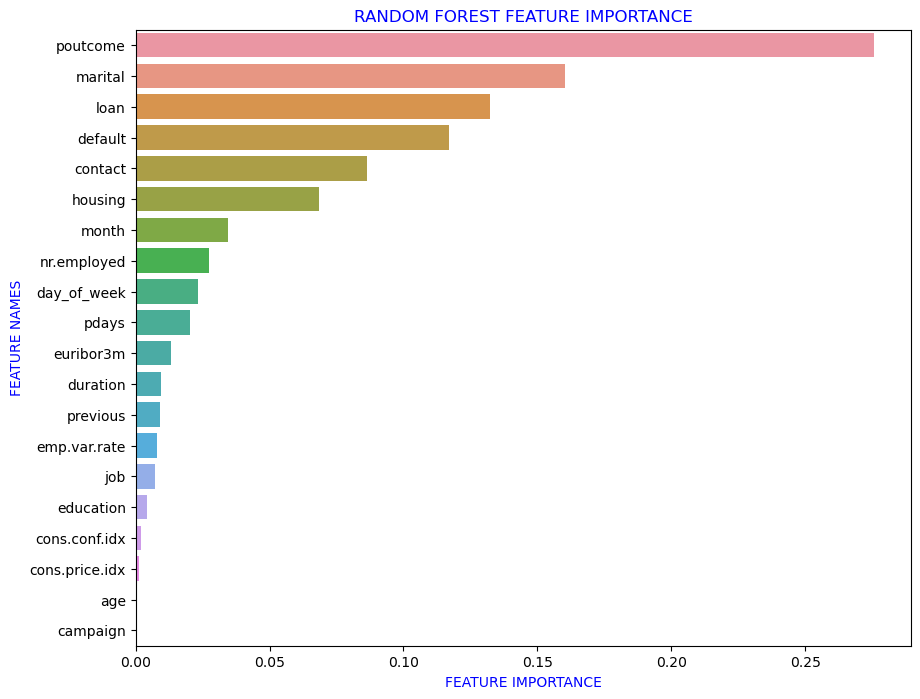

In [28]:


rf=RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)



#we call function plot_feature_importance defined in file cc_fi_fcts
cc_fi_fcts.plot_feature_importance(rf.feature_importances_,X_train.columns,'RANDOM FOREST')

sel = SelectFromModel(rf,prefit=True)
sel.fit(X_train,y_train)
sel.get_support()

#the name of selected features
selected_features_rf= X_train.columns[(sel.get_support())]

selected_features_rf

In [29]:
#the delected_Featyres_rf=['marital', 'default', 'housing', 'loan', 'contact', 'poutcome']
#are going to be considered.

### FEATURE SELECTION WITH LOGISITC REGRESSION 

In [30]:
extractor = SelectFromModel(LogisticRegression(penalty='l1', \
solver = 'liblinear' ,random_state = 42, max_iter=10000))
extractor
extractor.fit(X_train, y_train)
extractor.get_support()
selected_features_log_reg= X_train.columns[(extractor.get_support())]

selected_features=list(selected_features_log_reg)

print("selected, features: ", selected_features_log_reg)
      
coefs=extractor.estimator_.coef_

print("feature coefficients: ",coefs)

#the dataframe with the feature coefficients according to logistic regression
coef_log_r_df =\
pd.DataFrame({'feature': list(X_train.columns), 'coefs': coefs[0]})

coef_log_r_df

selected, features:  Index(['age', 'job', 'marital', 'education', 'default', 'contact', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
feature coefficients:  [[ 1.24649359e-03  2.48756991e+00  8.01547753e-01  4.24194460e+00
   4.01355819e+00  0.00000000e+00  0.00000000e+00  6.36933758e+00
   1.82407108e+00  0.00000000e+00  4.54711882e-03 -2.78460813e-02
  -1.60774865e-03 -2.85009129e-01  5.17678814e-01 -4.88541051e-01
   4.13968127e-01  1.61067160e-02  2.28179453e-01 -8.46086427e-03]]


,feature,coefs
0,age,0.001246
1,job,2.487570
2,marital,0.801548
3,education,4.241945
4,default,4.013558
5,housing,0.000000
6,loan,0.000000
7,contact,6.369338
8,month,1.824071
9,day_of_week,0.000000


In [31]:
##for the feature selection we could also try the majority vote

#HEREAFTER WE WiLL CONTINUe WITH THE FEATURE SELECTION FROM THE RANDOM FOREST
#'marital', 'default', 'housing', 'loan', 'poutcome'

### IMPROVING THE MODELS

In [32]:
#we define the train and test sets with the selected features from the random forest


X_train_1=X_train[list(selected_features_rf)]
X_test_1=X_test[list(selected_features_rf)]
X_train_1.head(),"------",X_test_1.head()

(        marital   default   housing      loan   contact  poutcome
 34300  0.140054  0.128794  0.116199  0.109332  0.147382  0.088325
 25076  0.101577  0.128794  0.108802  0.113405  0.147382  0.142319
 17533  0.101577  0.051536  0.108802  0.113405  0.147382  0.088325
 35820  0.101577  0.051536  0.108802  0.113405  0.147382  0.088325
 1080   0.101577  0.128794  0.116199  0.113405  0.052317  0.088325,
 '------',
         marital   default   housing      loan   contact  poutcome
 31165  0.139967  0.128763  0.116153  0.113376  0.147343  0.088296
 26855  0.103231  0.128794  0.116199  0.113405  0.147382  0.088325
 38292  0.101577  0.128794  0.108802  0.113405  0.147382  0.088325
 8532   0.140054  0.128794  0.108802  0.113405  0.052317  0.088325
 25472  0.101577  0.128794  0.116199  0.113405  0.147382  0.088325)

In [33]:
#WE WILL USE THE FOUR PIPELINE MODELS FOR 
#KNN, LOG. REGRESSION, DECISION TREE AND SVM
#DEFINED EARLIER

In [34]:
#parameters pipe

#dictionary parameter KNN
param_knn={\
'estim':[pipe_knn],
'estim__knn_clas__n_neighbors':[3,7,10,30,70], 
'estim__knn_clas__weights':["uniform", "distance"],
#'estim__p':[1,2]
}

#dictionary parameter Logistic Regression
param_log_reg={\
'estim':[pipe_log_reg],
'estim__logistic_reg_clas__max_iter':[100,1000]
}

param_dt = {\
'estim':[pipe_dtree],
"estim__dt_clas__criterion":["gini","entropy"],
'estim__dt_clas__min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
'estim__dt_clas__max_depth': [2, 5, 10],
'estim__dt_clas__min_samples_split': [0.1, 0.2, 0.05]}


param_svm = {\
'estim':[pipe_svm],
"estim__svm_clas__kernel": ['rbf','sigmoid'],#, 'poly', 'linear', 'sigmoid'],
'estim__svm_clas__gamma': [0.1, 1.0, 10.0, 100.0],#, 100.0],
'estim__svm_clas__C':[1,10,100]}
#[2,3]
#'estim__svm_clas__C':[1,100]
#['rbf','sigmoid']OK 'estim__svm_clas__gamma': [0.01, 1.0, 10.0]
#'estim__svm_clas__degree': [2,3],\


pipeline = Pipeline([('estim', pipe_knn)])

params = [param_knn,\
param_log_reg,\
param_dt,\
param_svm    
]

#params = [param_svm]
#pipeline = Pipeline([('estim',pipe_svm)])


#we test the grid search on the accuracy metric
#gs_obj=GridSearchCV(pipeline, params, cv=5,scoring="accuracy")


In [35]:
val_li_score_metrics=["accuracy","f1","precision","recall","roc_auc"]
v_pipeline=pipeline
v_params=params
v_cv=5
v_X=X_train_1
v_y=y_train
v_X_test=X_test_1
v_y_test=y_test

In [36]:
print("hi")

hi


In [37]:
#di_rep_gs_multiple_metrics=dict, key=id metric
#vamue=[gs oject, best score]

#we call fct fct_di_results_gridsearchcv_various_score_metrics
#defined in file cc_fi_fcts

di_rep_gs_multiple_metrics=\
cc_fi_fcts.fct_di_results_gridsearchcv_various_score_metrics(
val_li_score_metrics,\
val_pipeline=v_pipeline,\
val_params=v_params,\
val_cv=v_cv,\
val_X=v_X,\
val_y=v_y,\
val_X_test=v_X_test,\
val_y_test=v_y_test
)

In [38]:
print("hi")

hi


In [39]:
#di_best_model_info_per_metric: dictionary, 
#key=id metric
#value=[score, best model]

di_best_model_info_per_metric=\
cc_fi_fcts.fct_creation_df_performance_classifiers_from_gridsearchcv(\
val_di=di_rep_gs_multiple_metrics)

In [40]:
di_best_model_info_per_metric

{'accuracy': [0.9996115373409731, SVC(C=100, gamma=10.0)],
 'f1': [0.9982743744607421, SVC(C=100, gamma=10.0)],
 'precision': [1.0,
  DecisionTreeClassifier(max_depth=2, min_impurity_decrease=0.01,
                         min_samples_split=0.1, random_state=42)],
 'recall': [1.0,
  DecisionTreeClassifier(criterion='entropy', max_depth=5,
                         min_impurity_decrease=0.01, min_samples_split=0.1,
                         random_state=42)],
 'roc_auc': [0.9999984904122307, SVC(C=100, gamma=10.0)]}

In [41]:
#save the di_rep_gs_multiple_metrics in memory
with open(val_name_fi_pickle_di_gs_obj_multiple_metrics, 'wb') as fp0:
    pickle.dump(di_rep_gs_multiple_metrics,fp0)

In [42]:
#save the di_best_model_info_per_metric in memory
with open(val_name_fi_pickle_di_best_model_info_per_metric, 'wb') as fp:
    pickle.dump(di_best_model_info_per_metric,fp)

In [43]:
print("hi")

hi


In [44]:
#the dictionary with the results of the initiay createdl simple models
dict_results_multiple_models=\
    {
        'Model': ['KNN', 'Log.Regression', 'Decision-Tree',"SVM"], 
        'Train Time': [round(duration_knn_train,3),\
                       round(duration_log_reg_train,3),\
                       round(duration_dt_train,3),\
                       round(duration_svm_train,3)],
        "Train Accuracy":[accuracy_knn_train,accuracy_log_reg_train,\
                         accuracy_dt_train,\
                         accuracy_svm_train],
        "Test Accuracy":[accuracy_knn_test,accuracy_log_reg_test,\
                         accuracy_dt_test,\
                         accuracy_svm_test]
    }

#the dataframe with the results of the initial simple models
#where no gridsearch was employed
df_compare_clas = pd.DataFrame(dict_results_multiple_models)
df_compare_clas

,Model,Train Time,Train Accuracy,Test Accuracy
0,KNN,0.013,0.926386,0.904147
1,Log.Regression,0.066,0.909197,0.911916
2,Decision-Tree,0.089,1.000000,1.000000
3,SVM,8.006,0.921725,0.914538
